### 1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

En esta primera fase del análisis se ha aplicado una función EDA (Exploratory Data Analysis) sobre el archivo “hr_raw_data.csv”, con el objetivo de obtener una visión general de la estructura, distribución y calidad de los datos.

El propósito de este análisis exploratorio es evaluar la integridad y consistencia del conjunto de datos, identificando la presencia de valores nulos, duplicados o atípicos, así como analizar la distribución de las variables numéricas y categóricas. Este diagnóstico preliminar resulta esencial para definir posteriormente las estrategias de limpieza, imputación y transformación de los datos, garantizando la validez de los análisis estadísticos y visualizaciones posteriores.

En esta etapa se han utilizado principalmente gráficos de tipo histograma, boxplot y gráficos de barras, ya que se consideran los más adecuados para un EDA inicial, por los siguientes motivos:

- Histogramas: permiten visualizar la distribución de las variables numéricas, detectar sesgos, asimetrías o concentraciones inusuales de datos, así como identificar posibles outliers de forma visual.

- Boxplots: facilitan la detección clara y directa de valores atípicos, además de ofrecer información sobre la mediana, dispersión y simetría de las variables.

- Gráficos de barras: resultan especialmente útiles para analizar la frecuencia de las categorías en variables cualitativas, ayudando a detectar posibles desequilibrios, errores de codificación o categorías con baja representatividad.

Cabe destacar que los gráficos presentados en esta fase corresponden a datos aún sin procesos de limpieza, normalización o gestión de nulos. Por tanto, estas visualizaciones reflejan la naturaleza en bruto del dataset y constituyen un instrumento fundamental para detectar problemas estructurales o de calidad, así como para fundamentar las decisiones de tratamiento y depuración que se aplicarán posteriormente.

Finalmente, en algunos casos, ciertos gráficos pueden parecer inconsistentes ,por ejemplo, cuando se representan variables numéricas como categóricas o viceversa. Sin embargo, esta aproximación se ha realizado de forma deliberada con el objetivo de obtener una visión exhaustiva y contrastada de cada variable, permitiendo determinar con mayor precisión las estrategias de corrección y tratamiento más adecuadas para el análisis estadístico posterior. En dichos casos, se ha incluido una breve descripción indicando qué tipo de visualización sería más apropiada para cada variable.

En primer lugar se procede a importar las librerías necesarias:

In [1]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
import numpy as np           # Cálculos numéricos y manejo de arreglos
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from scipy import stats      # Funciones y pruebas estadísticas
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos

1. Cargamos los archivos csv

In [2]:
# ver todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# ver todas las filas
pd.set_option('display.max_rows', None)

In [6]:
df_rotacion = pd.read_csv("datos-empleados-rotacion.csv")

Hacemos una primera visualización de los datos:

Función EDA:

In [7]:
def eda(df):
    """
    Exploratory Data Analysis (EDA) profesional de un DataFrame.

    Incluye:
    - Vista general (dimensiones, tipos, primeras/últimas filas)
    - Estadísticas descriptivas (numéricas y categóricas)
    - Valores nulos, duplicados y únicos
    - Detección de outliers (numéricos)
    - Gráficos (mostrados al final)
    """

    
    # CONFIGURACIÓN GLOBAL DE ESTILO PARA LOS GRÁFICOS
    
    # Se ajustan parámetros visuales para mantener coherencia estética en todas las visualizaciones
    sns.set_theme(style="whitegrid", context="talk")  # Fondo blanco con rejilla y tamaño de fuente amplio
    plt.rcParams.update({
        "figure.figsize": (10, 5),         # Tamaño estándar de las figuras
        "axes.titlesize": 16,              # Tamaño de fuente del título de los gráficos
        "axes.labelsize": 13,              # Tamaño de fuente de las etiquetas de ejes
        "axes.edgecolor": "#333333",       # Color de los bordes de los ejes
        "axes.linewidth": 0.8,             # Grosor de los bordes de los ejes
        "xtick.labelsize": 11,             # Tamaño de las etiquetas del eje X
        "ytick.labelsize": 11,             # Tamaño de las etiquetas del eje Y
        "font.family": "sans-serif",       # Tipo de fuente general
        "font.sans-serif": ["DejaVu Sans"] # Fuente usada para el texto
    })

    # Colores para los distintos tipos de visualización
    color_hist = "#4B8BBE"  # Azul para histogramas
    color_box = "#E07A5F"   # Naranja para boxplots

    
    # COMPROBACIONES INICIALES DEL DATASET
    
    # Información básica: número de filas y columnas
    print(f"Dimensiones del dataset: {df.shape[0]:,} filas × {df.shape[1]:,} columnas\n")

    # Muestra las 5 primeras filas
    print(" Primeras 5 filas del dataset:")
    display(df.head())

    # Muestra las 5 últimas filas
    print("\n Últimas 5 filas del dataset:")
    display(df.tail())

    # Información general del DataFrame (tipos, nulos, memoria usada)
    print("\nInformación general:")
    df.info()

    # Tipos de datos de cada columna
    print("\nTipos de datos por columna:")
    display(df.dtypes.to_frame("Tipo de dato"))

    
    # SEPARACIÓN DE VARIABLES SEGÚN SU TIPO
    
    # Se identifican las columnas numéricas y categóricas
    num_cols = df.select_dtypes(include="number").columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    print(f"\nColumnas numéricas: {len(num_cols)}")
    print(f"Columnas categóricas: {len(cat_cols)}")

    
    # ESTADÍSTICAS DESCRIPTIVAS Y DETECCIÓN DE OUTLIERS
    
    if num_cols:
        print("\nEstadísticas descriptivas (numéricas):")
        # Se muestran estadísticas extendidas (con percentiles adicionales)
        display(df[num_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)

        # Cálculo de valores atípicos mediante el rango intercuartílico (IQR)
        Q1 = df[num_cols].quantile(0.25)
        Q3 = df[num_cols].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

        # Solo se muestran columnas donde existan outliers
        outliers = outliers[outliers > 0]
        if not outliers.empty:
            print("\nPosibles outliers detectados:")
            display(outliers.to_frame("Filas con outliers"))
        else:
            print("\nNo se detectaron outliers significativos.")

    
    # ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES CATEGÓRICAS
    
    if cat_cols:
        print("\nEstadísticas descriptivas (categóricas):")
        # Muestra conteos, frecuencia de categoría más común y número de categorías
        display(df[cat_cols].describe().T)
    else:
        print("\nNo hay columnas categóricas.")

    
    # COMPROBACIÓN DE VALORES NULOS Y DUPLICADOS
    
    print("\nValores nulos por columna:")
    # Se calcula el número y porcentaje de valores nulos por columna
    nulos_df = pd.DataFrame({
        "Nulos": df.isnull().sum(),
        "% Nulos": (df.isnull().mean() * 100).round(2)
    }).sort_values("% Nulos", ascending=False)

    # Si no hay nulos, se muestra un mensaje
    if nulos_df["Nulos"].sum() == 0:
        print("No se encontraron valores nulos en el dataset.")
    else:
        display(nulos_df[nulos_df["Nulos"] > 0])

    # Cálculo del número de filas duplicadas
    dup_count = df.duplicated().sum()
    if dup_count == 0:
        print("\nNo se encontraron filas duplicadas en el dataset.")
    else:
        print(f"\nFilas duplicadas: {dup_count:,}")

    
    # RESUMEN GENERAL DEL DATASET
    
    # Se genera un resumen general con tipo de dato, valores únicos y porcentaje de nulos
    resumen = pd.DataFrame({
        "Columna": df.columns,
        "Tipo": df.dtypes.astype(str),
        "Valores únicos": df.nunique().values,
        "% Nulos": (df.isnull().mean() * 100).round(2).values
    })
    print("\nResumen general de columnas:")
    display(resumen)

    
    # VISUALIZACIONES GRÁFICAS 
    
    print("\nVisualizaciones")

    
    # VISUALIZACIÓN DE VARIABLES NUMÉRICAS
    
    print("\nGráfico variables numéricas")
    # Se excluye 'Loyalty Number' solo en los gráficos (no del análisis)
    plot_num_cols = [col for col in num_cols if col != "Loyalty Number"]

    for col in plot_num_cols:
        data = df[col].dropna()  # Se eliminan valores nulos
        if data.empty:
            continue  # Se omite si no hay datos válidos

        # Se crean dos subgráficos: uno para histograma y otro para boxplot
        fig, axes = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'width_ratios': [2, 1]})
        fig.suptitle(f"Distribución y boxplot de {col}", fontsize=15, fontweight="bold", y=1.03)

        # Histograma con densidad (KDE)
        sns.histplot(data, kde=True, bins=30, color=color_hist, ax=axes[0])

        # Cálculo de medidas de tendencia central
        mean_val = data.mean()
        median_val = data.median()
        mode_val = data.mode()[0] if not data.mode().empty else None

        # Líneas verticales para media, mediana y moda
        axes[0].axvline(mean_val, color="red", linestyle="--", linewidth=1.3, label=f"Media ({mean_val:.2f})")
        axes[0].axvline(median_val, color="green", linestyle="--", linewidth=1.3, label=f"Mediana ({median_val:.2f})")
        if mode_val is not None:
            axes[0].axvline(mode_val, color="orange", linestyle="--", linewidth=1.3, label=f"Moda ({mode_val:.2f})")

        # Leyenda (cuadro informativo) más pequeña y más transparente
        axes[0].legend(
            fontsize=7,                # Fuente más pequeña
            loc="lower right",         # Posición en la esquina inferior derecha
            frameon=True,              # Cuadro visible
            facecolor="white",         # Fondo blanco
            edgecolor="gray",          # Borde gris
            framealpha=0.6             # Transparencia aumentada (más sutil)
        )

        # Ejes X e Y con etiquetas en negrita
        axes[0].set_xlabel(col, fontsize=12, fontweight="bold")
        axes[0].set_ylabel("Frecuencia", fontsize=12, fontweight="bold")

        # Boxplot complementario
        sns.boxplot(y=data, color=color_box, ax=axes[1])
        axes[1].set_ylabel("")  # Sin etiqueta en Y
        axes[1].set_xlabel("")  # Sin etiqueta en X

        # Ajuste automático de espaciado
        plt.tight_layout()
        plt.show()

    
    # VISUALIZACIÓN DE VARIABLES CATEGÓRICAS
    
    print("\nGráfico variables categóricas")
    if not cat_cols:
        # Si no existen columnas categóricas
        print("No hay variables categóricas en los datos en bruto.")
    else:
        for col in cat_cols:
            plt.figure(figsize=(10, 5))  # Tamaño del gráfico de barras
            order = df[col].value_counts().index[:20]  # Orden de las 20 categorías más frecuentes

            # Gráfico de barras (countplot)
            sns.countplot(
                x=col,
                hue=col,                  # Cada categoría recibe un color distinto
                data=df,
                order=order,              # Ordenar por frecuencia
                palette="crest",          # Paleta de colores suaves
                legend=False,             # Se elimina leyenda redundante
                edgecolor="gray",         # Borde gris
                linewidth=0.6             # Grosor del borde
            )

            # Título y etiquetas con formato profesional
            plt.title(f"Distribución de {col}", fontsize=14, fontweight="bold", pad=15)
            plt.xlabel(col, fontsize=12, fontweight="bold")
            plt.ylabel("Frecuencia", fontsize=12, fontweight="bold")
            plt.xticks(rotation=25, ha="right")  # Rotación de etiquetas para evitar solapamiento
            plt.tight_layout()
            plt.show()

    
    # RESULTADO FINAL
    
    # Se devuelve el resumen general del dataset como resultado
    return resumen



Resultados obtenidos para df_customer_flight:

EDA
Dimensiones del dataset: 1,678 filas × 42 columnas

 Primeras 5 filas del dataset:


,Unnamed: 0,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0



 Últimas 5 filas del dataset:


,Unnamed: 0,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
1673,1673,43,No,NaN,488.944444,NaN,-26,3,Medical,1,824,2,1,NaN,4,1,rESEaRcH SciEnTiST,3,Single,"3949,17$","10267,83$",4,NaN,NaN,12,"3,0",4,NaN,0,NaN,2,"3,0",3,NaN,1,2,"3949,17$",1980,NaN,NaN,NaN,Yes
1674,1674,47,No,NaN,1973.984127,NaN,26,4,NaN,1,1087,4,1,NaN,3,5,mANager,3,Married,"15943,72$","41453,67$",3,Y,No,11,"3,0",3,Full Time,1,"27,0",2,"3,0",5,NaN,1,0,"15943,72$",1976,"191324,62$",NaN,NaN,False
1675,1675,29,No,travel_rarely,290.035510,NaN,15,3,NaN,1,528,3,0,NaN,3,1,reSearch sCienTiSt,4,NaN,NaN,"6090,75$",1,NaN,No,19,"3,0",1,Part Time,0,"6,0",1,"3,0",6,NaN,1,5,NaN,1994,"28111,13$",NaN,NaN,False
1676,1676,47,No,travel_rarely,1032.487286,NaN,4,3,Life Sciences,1,76,3,1,NaN,2,3,maNufACTURING DIREctOr,2,Divorced,"8339,32$","21682,23$",8,NaN,Yes,12,NaN,3,Part Time,1,NaN,4,"3,0",22,NaN,14,10,"8339,32$",1976,"100071,84$",NaN,NaN,Yes
1677,1677,32,No,NaN,556.256661,NaN,2,2,Life Sciences,1,401,4,1,69.532083,3,2,resEArch scIENTisT,3,Single,NaN,"11681,39$",4,Y,Yes,14,"3,0",4,Part Time,0,"10,0",2,"3,0",8,NaN,0,7,NaN,1991,"53914,11$",NaN,NaN,0



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1678 entries, 0 to 1677
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1678 non-null   int64  
 1   age                       1678 non-null   object 
 2   attrition                 1678 non-null   object 
 3   businesstravel            877 non-null    object 
 4   dailyrate                 1678 non-null   float64
 5   department                312 non-null    object 
 6   distancefromhome          1678 non-null   int64  
 7   education                 1678 non-null   int64  
 8   educationfield            904 non-null    object 
 9   employeecount             1678 non-null   int64  
 10  employeenumber            1678 non-null   int64  
 11  environmentsatisfaction   1678 non-null   int64  
 12  gender                    1678 non-null   int64  
 13  hourlyrate                411 non-null   

,Tipo de dato
Unnamed: 0,int64
age,object
attrition,object
businesstravel,object
dailyrate,float64
department,object
distancefromhome,int64
education,int64
educationfield,object
employeecount,int64



Columnas numéricas: 22
Columnas categóricas: 20

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Unnamed: 0,1678.0,838.500000,484.541192,0.000000,16.770000,83.850000,419.250000,838.500000,1257.750000,1593.150000,1660.230000,1677.000000
dailyrate,1678.0,668.079714,470.787298,104.103175,207.008492,240.278175,290.035510,556.256661,971.956349,1815.073413,1984.372619,2063.388889
distancefromhome,1678.0,4.504172,14.652066,-49.000000,-46.000000,-30.150000,2.000000,5.000000,11.000000,25.000000,29.000000,29.000000
education,1678.0,2.932658,1.024270,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,4.000000,5.000000,5.000000
employeecount,1678.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
employeenumber,1678.0,809.859952,467.084867,1.000000,16.770000,81.850000,403.250000,813.500000,1215.750000,1534.150000,1598.230000,1614.000000
environmentsatisfaction,1678.0,4.264005,6.912695,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,14.000000,43.460000,49.000000
gender,1678.0,0.398689,0.489774,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
hourlyrate,411.0,83.140768,57.272101,13.012897,26.406250,31.384425,36.254439,69.532083,116.987103,219.297619,247.404266,255.963294
jobinvolvement,1678.0,2.740763,0.710359,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000



Posibles outliers detectados:


,Filas con outliers
dailyrate,14
distancefromhome,299
environmentsatisfaction,102
hourlyrate,17
numcompaniesworked,59
stockoptionlevel,93
trainingtimeslastyear,272
yearsatcompany,118
yearssincelastpromotion,123
yearswithcurrmanager,16



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
age,1678,54,35,88
attrition,1678,2,No,1406
businesstravel,877,3,travel_rarely,616
department,312,3,Research & Development,203
educationfield,904,6,Life Sciences,367
jobrole,1678,1579,mANager,5
maritalstatus,1003,5,Married,419
monthlyincome,1189,493,"2342,59$",228
monthlyrate,1678,673,"11681,39$",326
over18,740,1,Y,740



Valores nulos por columna:


,Nulos,% Nulos
numberchildren,1678,100.00
yearsincurrentrole,1643,97.91
department,1366,81.41
roledepartament,1366,81.41
hourlyrate,1267,75.51
over18,938,55.90
businesstravel,801,47.74
educationfield,774,46.13
overtime,696,41.48
maritalstatus,675,40.23



No se encontraron filas duplicadas en el dataset.

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
Unnamed: 0,Unnamed: 0,int64,1678,0.00
age,age,object,54,0.00
attrition,attrition,object,2,0.00
businesstravel,businesstravel,object,3,47.74
dailyrate,dailyrate,float64,673,0.00
department,department,object,3,81.41
distancefromhome,distancefromhome,int64,69,0.00
education,education,int64,5,0.00
educationfield,educationfield,object,6,46.13
employeecount,employeecount,int64,1,0.00



Visualizaciones

Gráfico variables numéricas


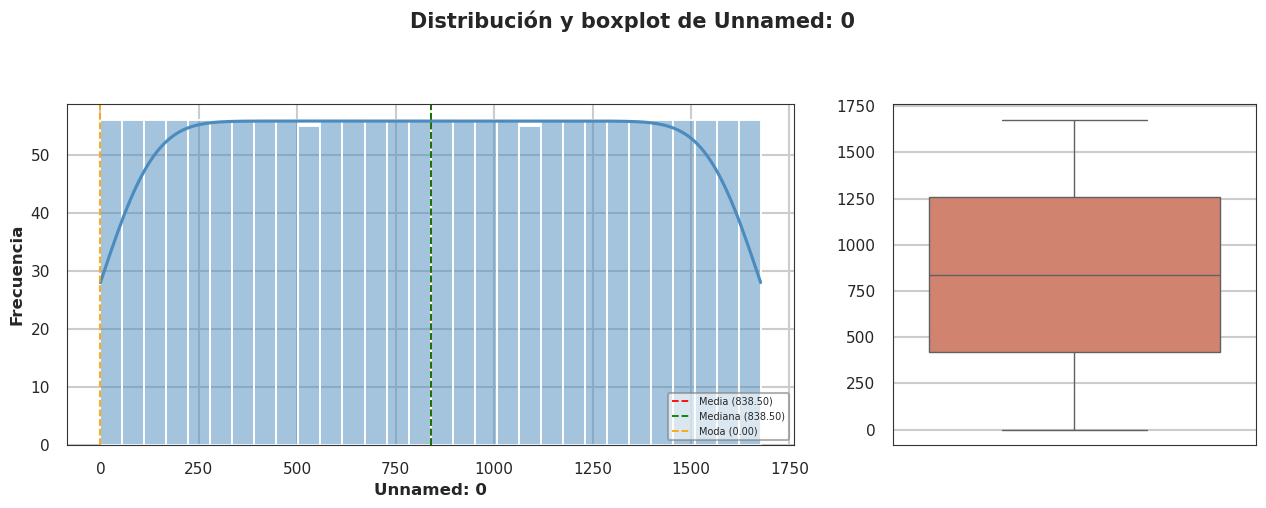

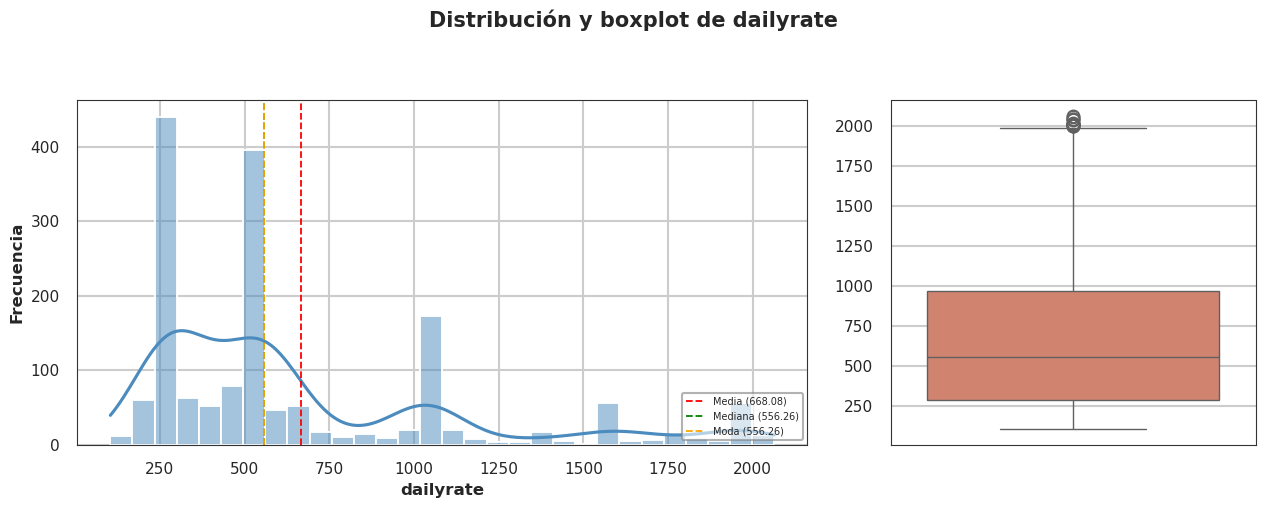

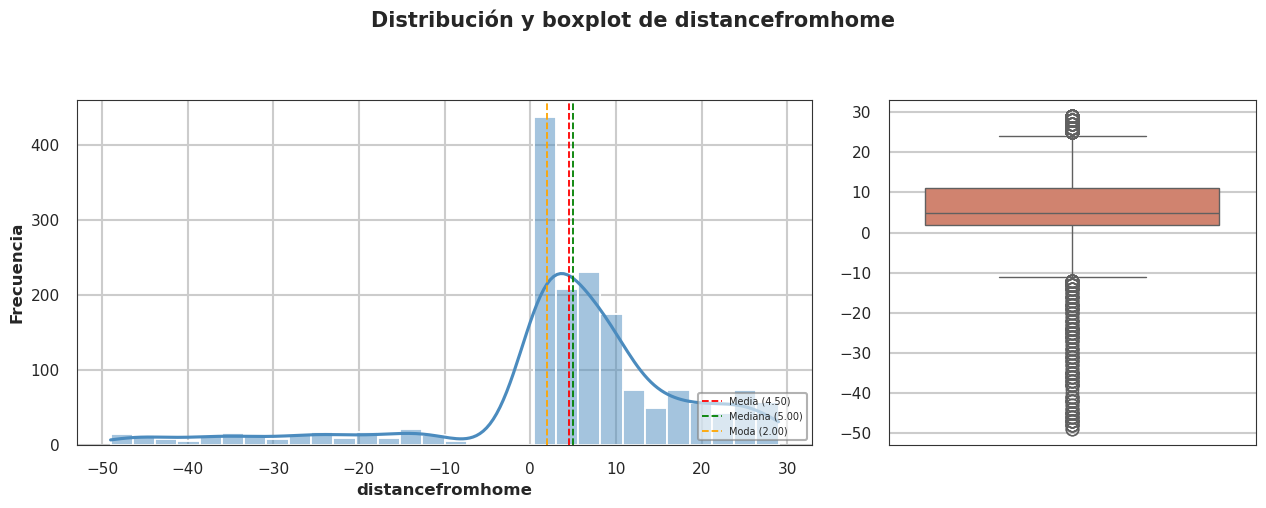

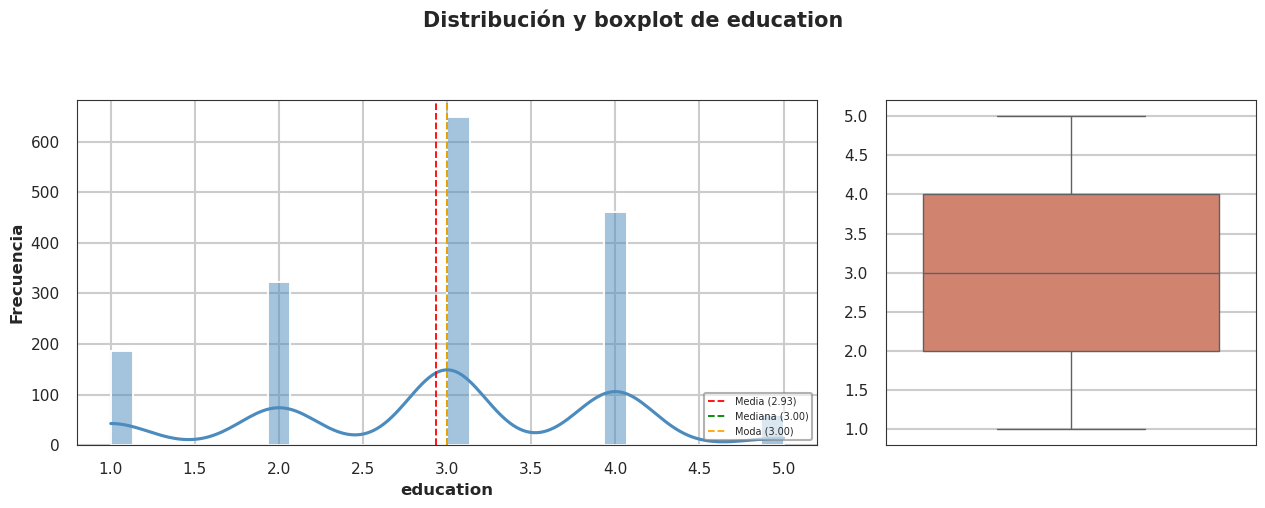

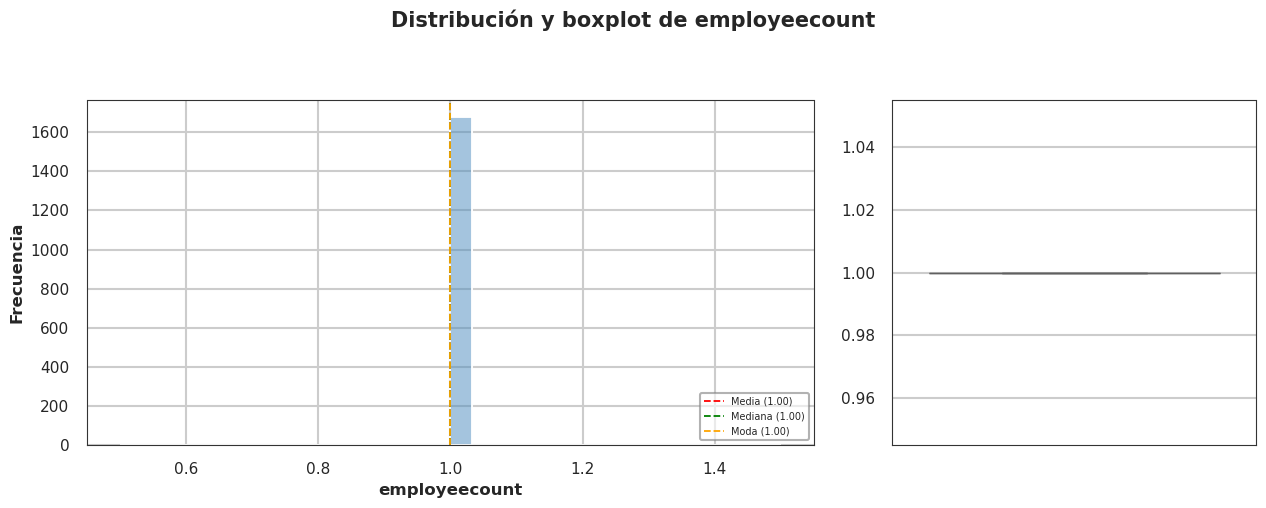

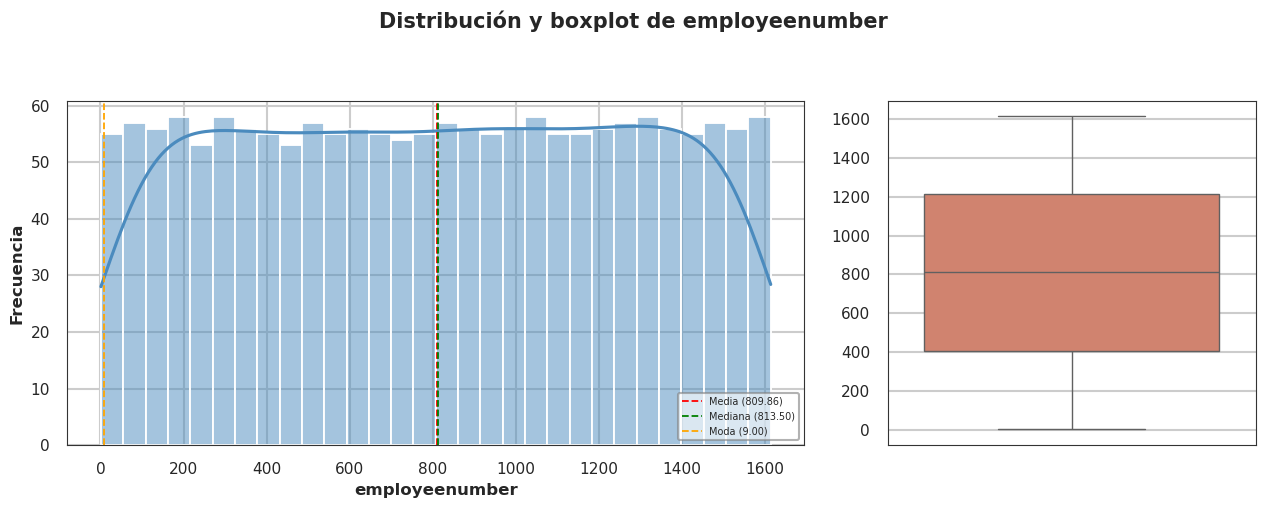

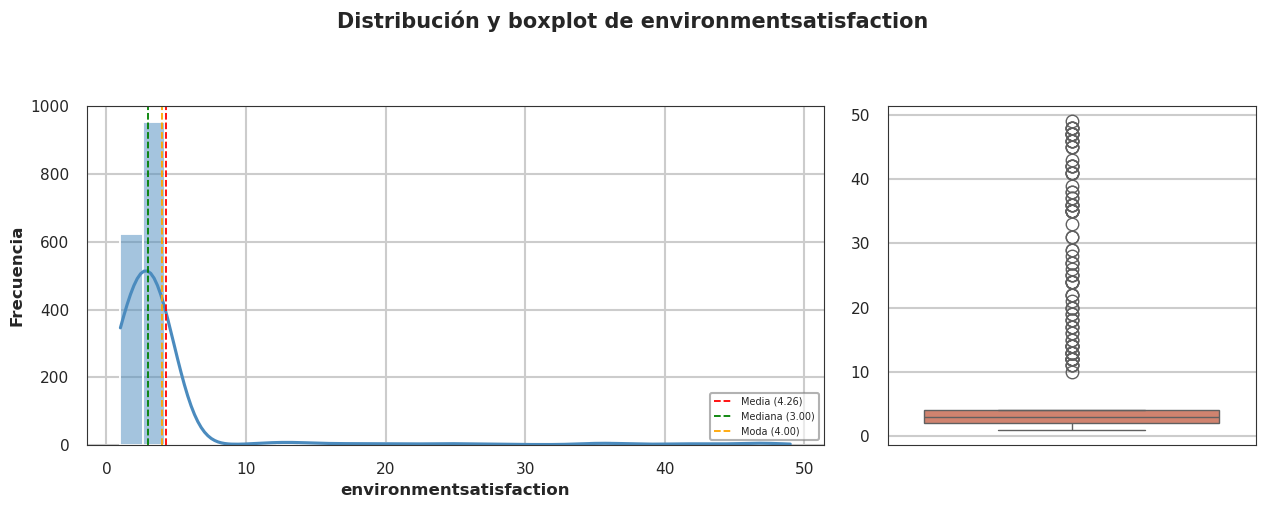

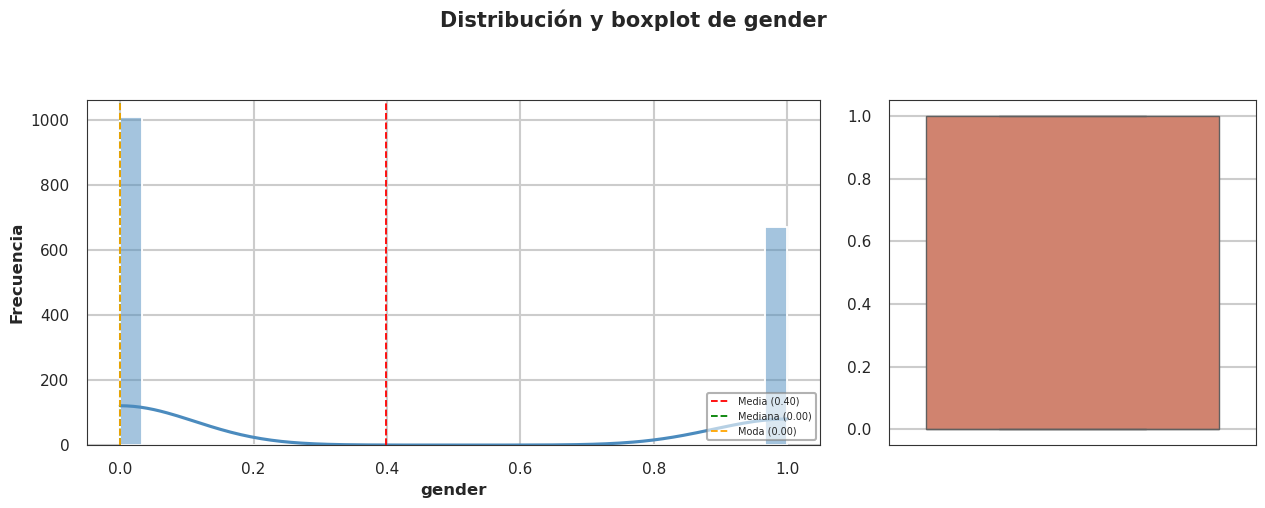

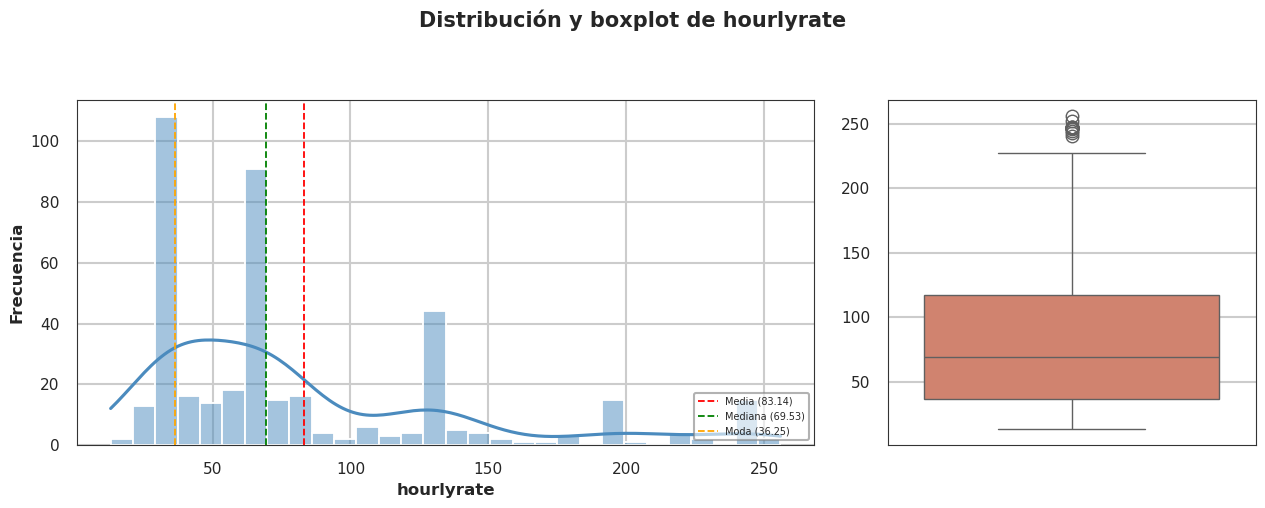

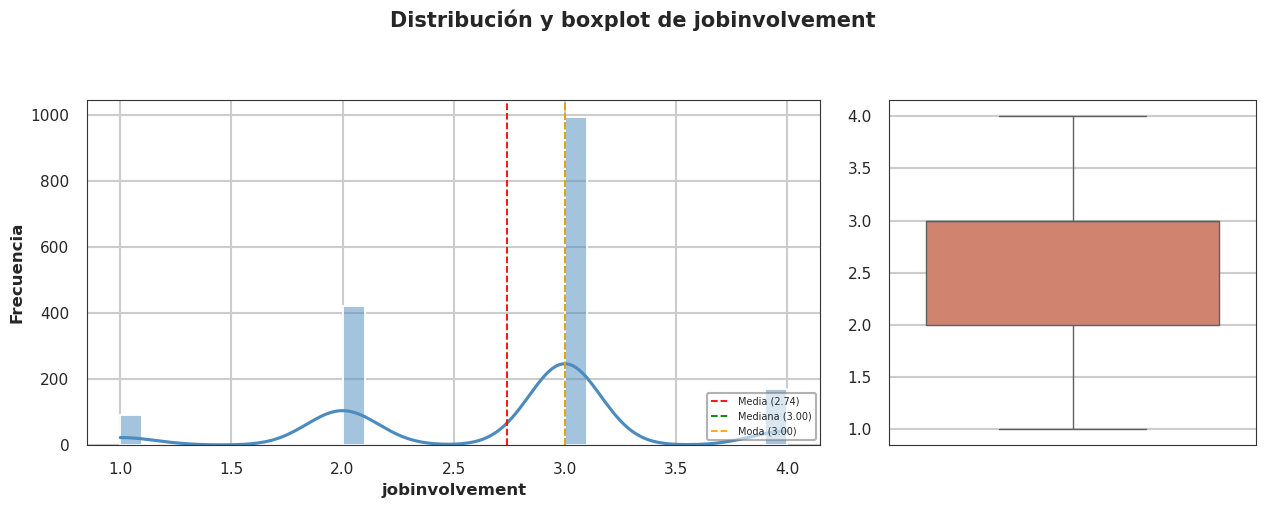

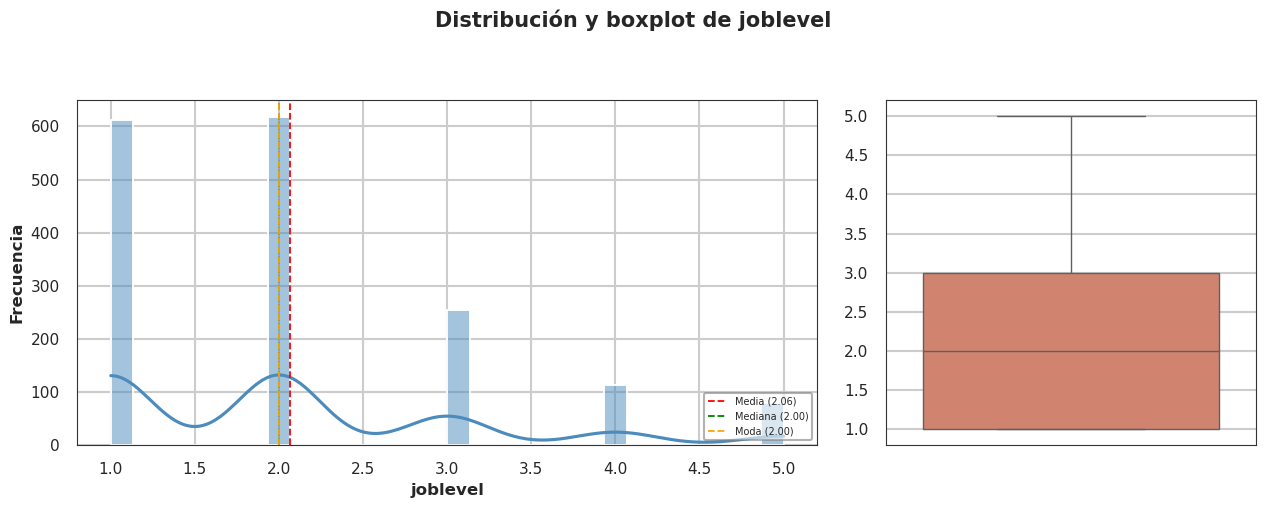

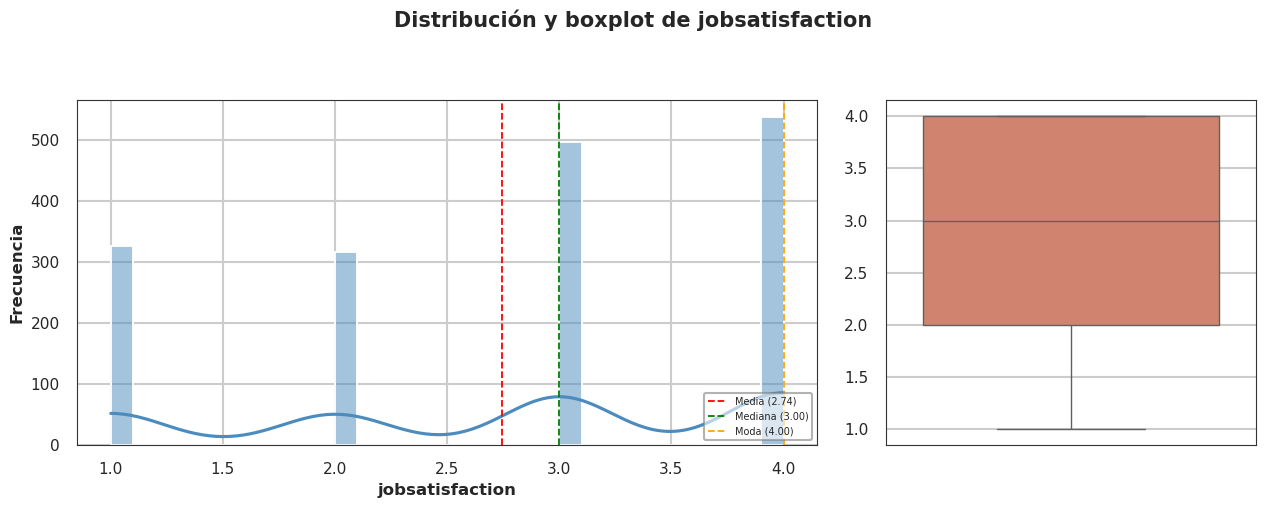

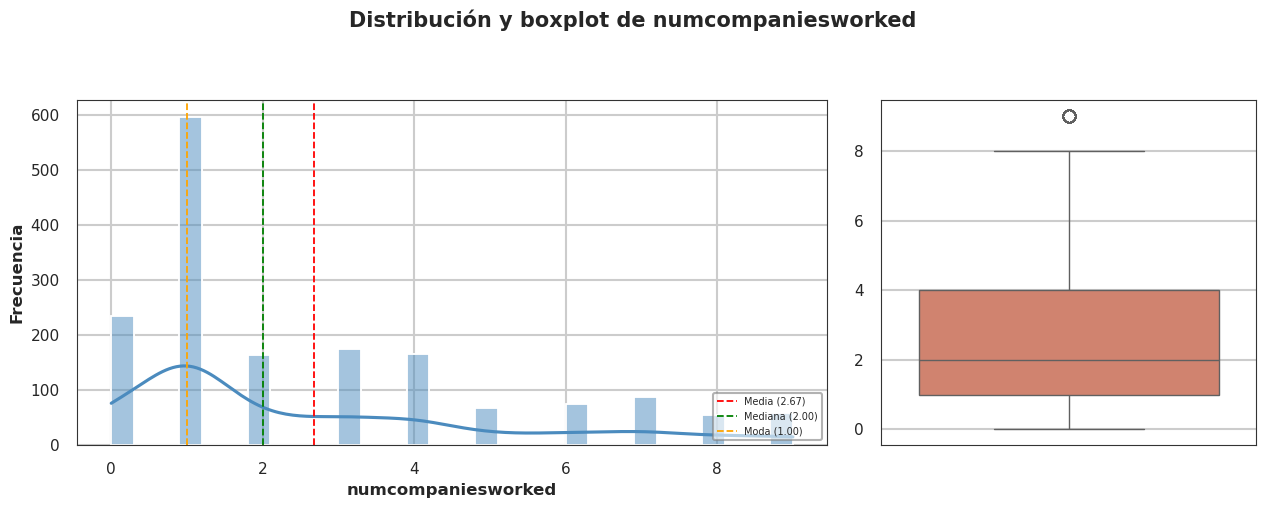

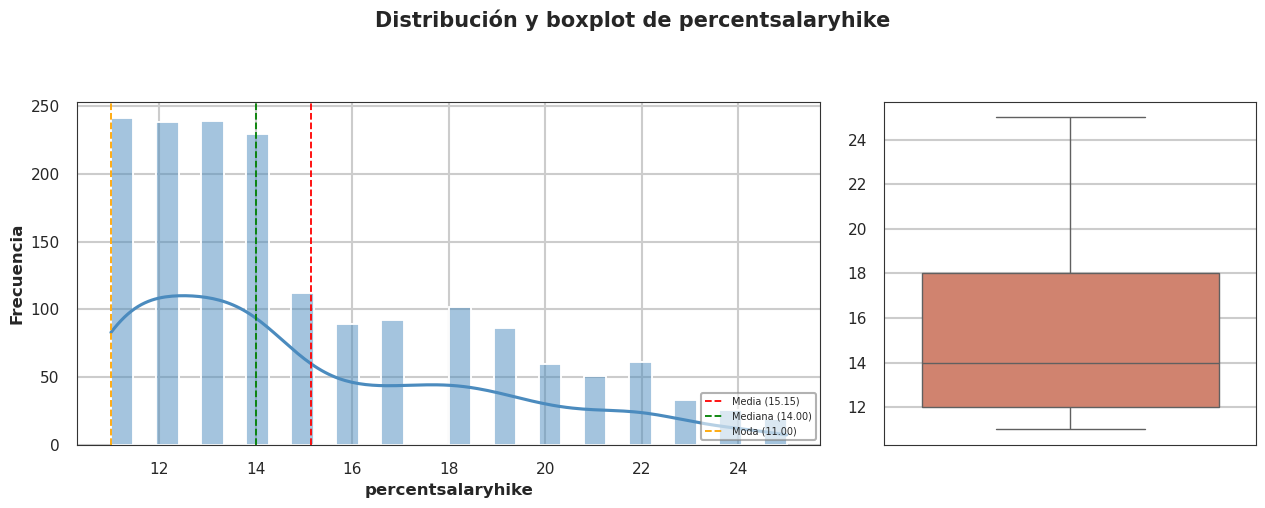

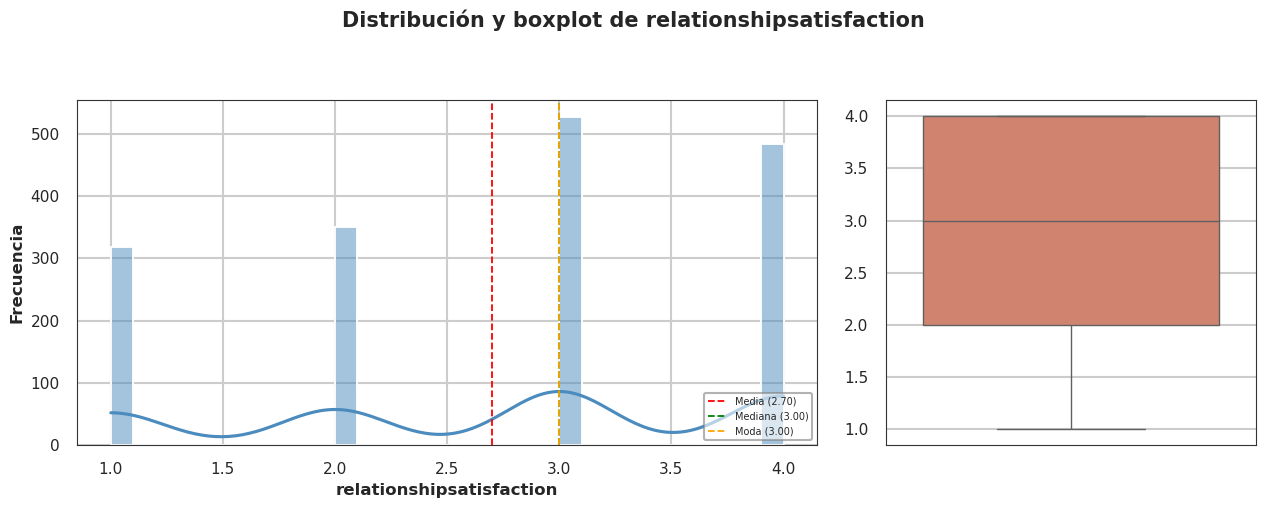

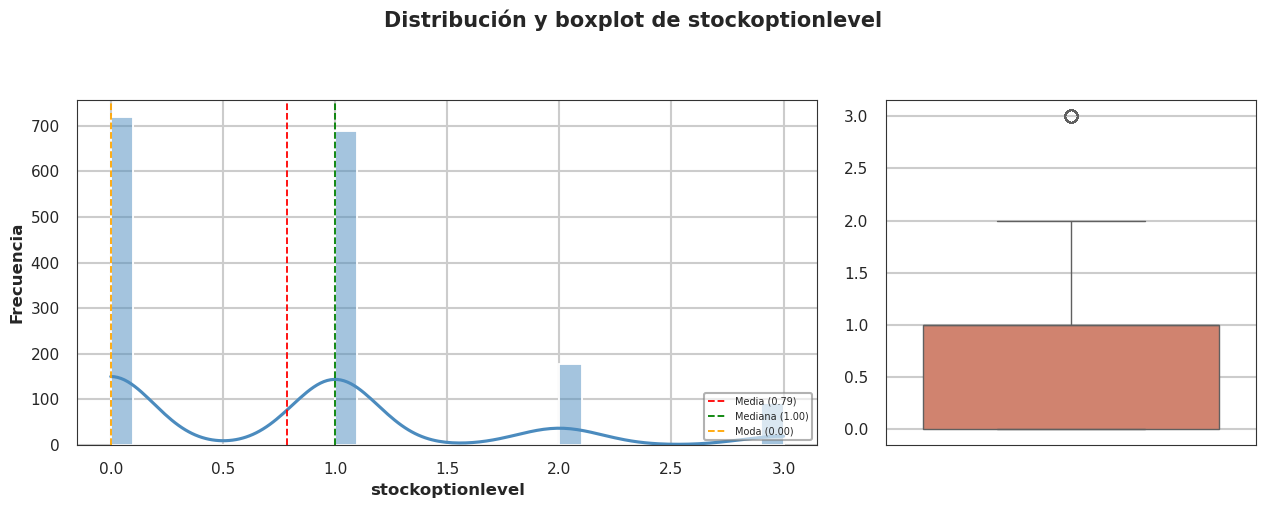

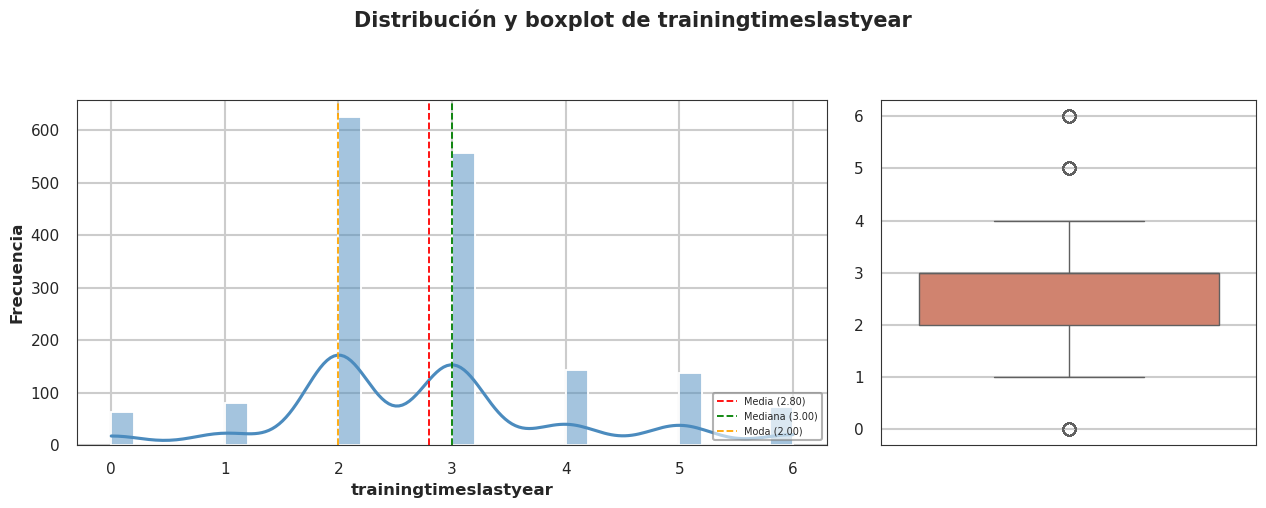

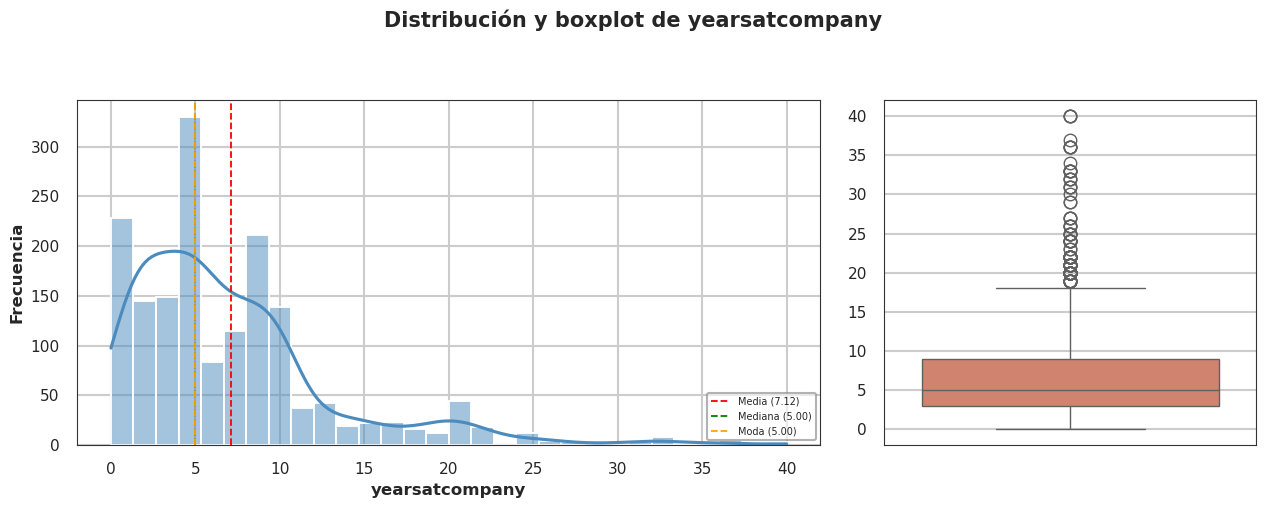

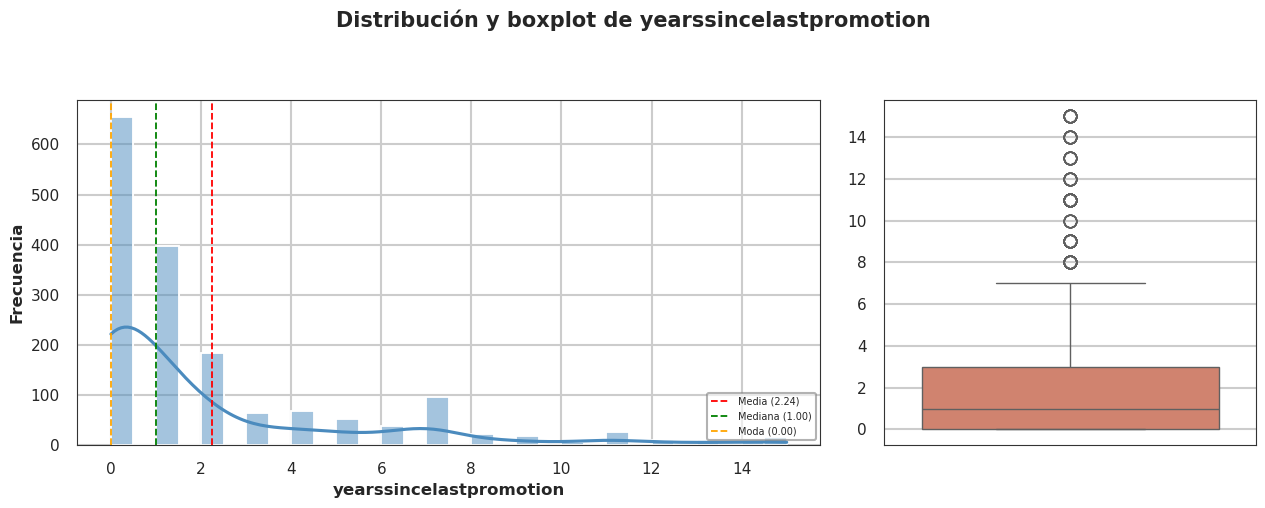

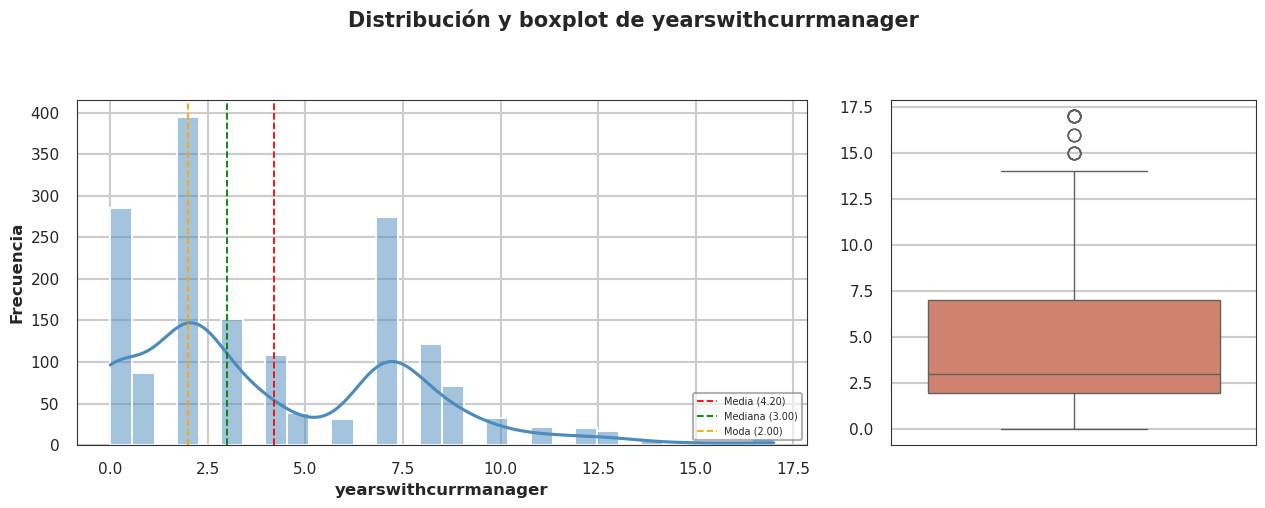

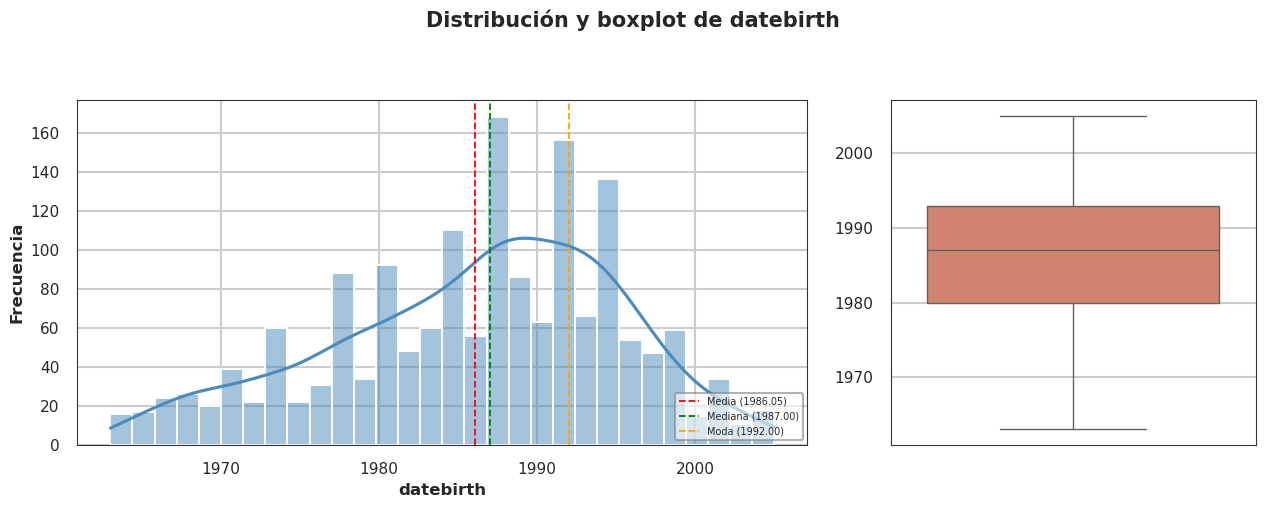


Gráfico variables categóricas


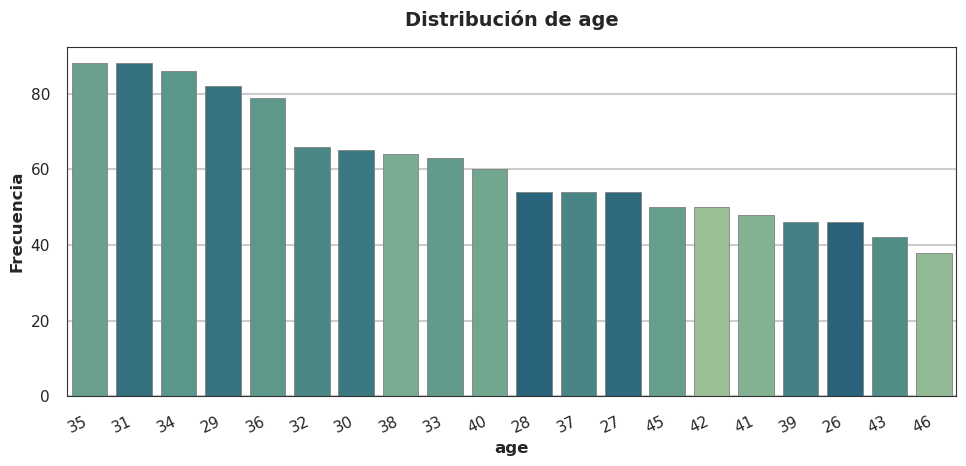

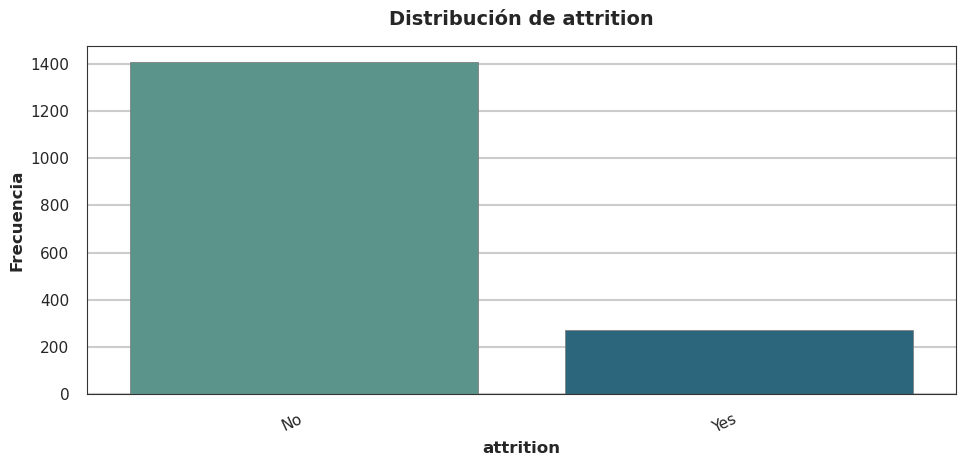

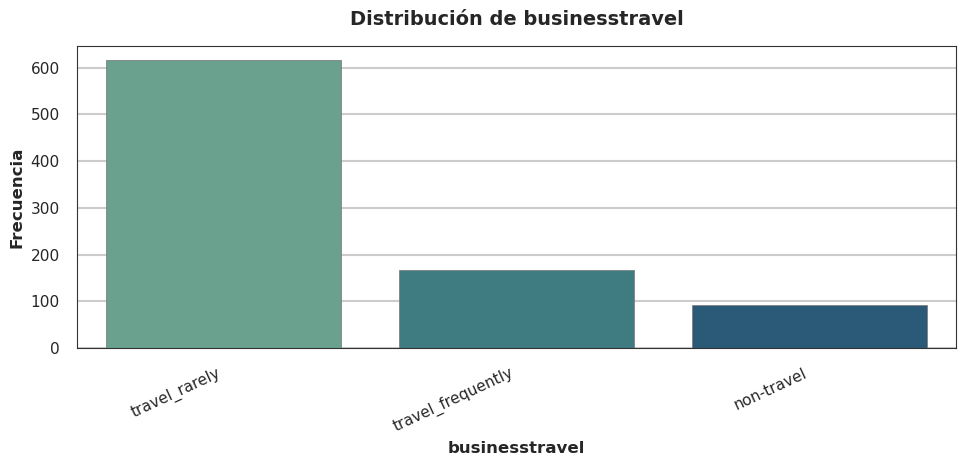

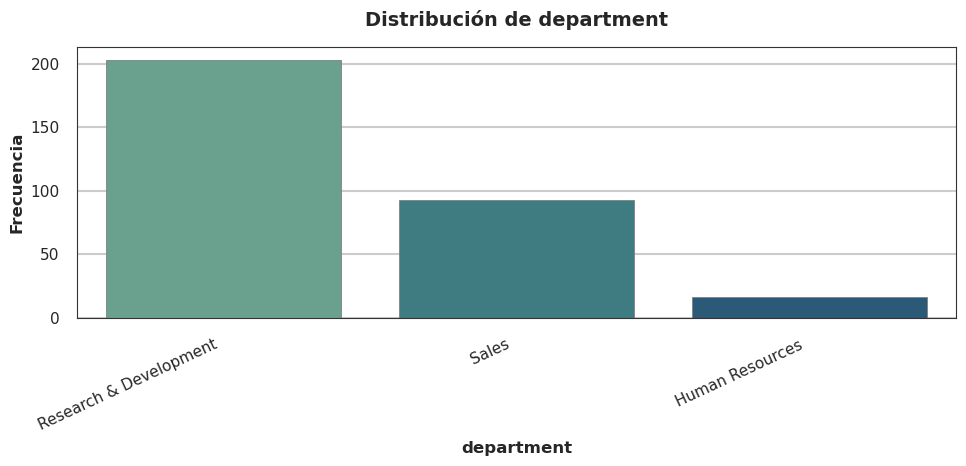

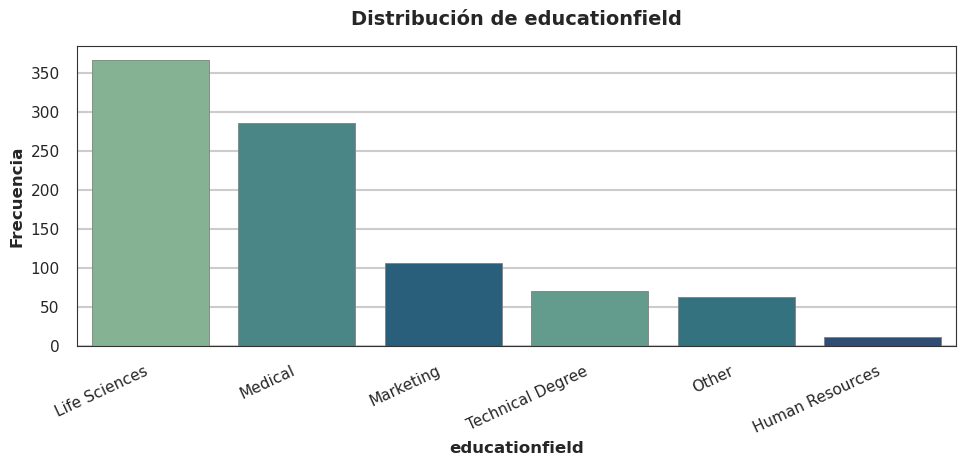

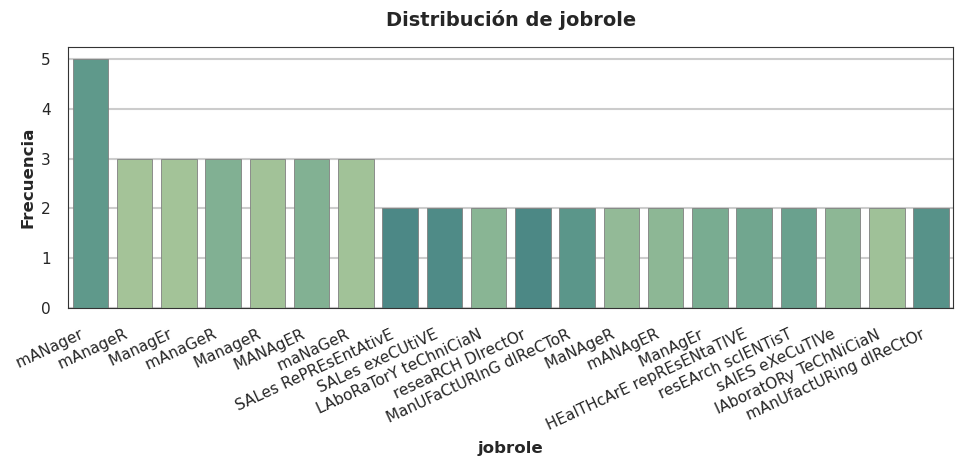

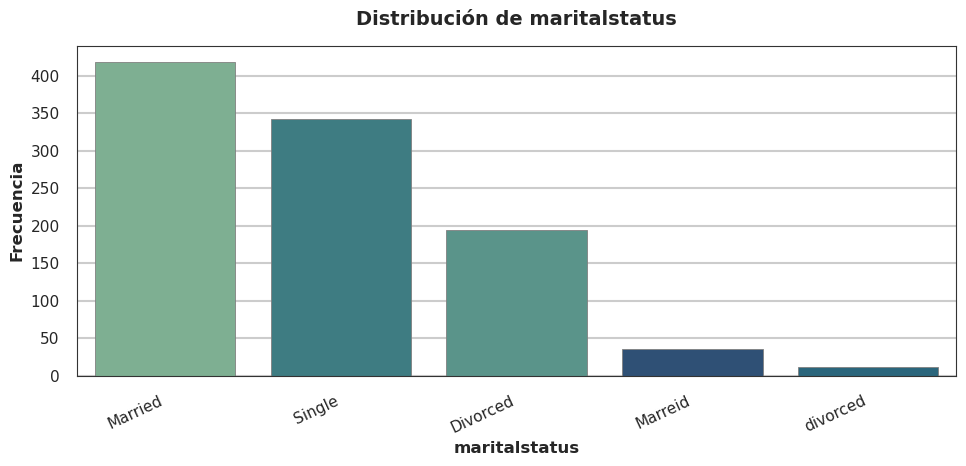

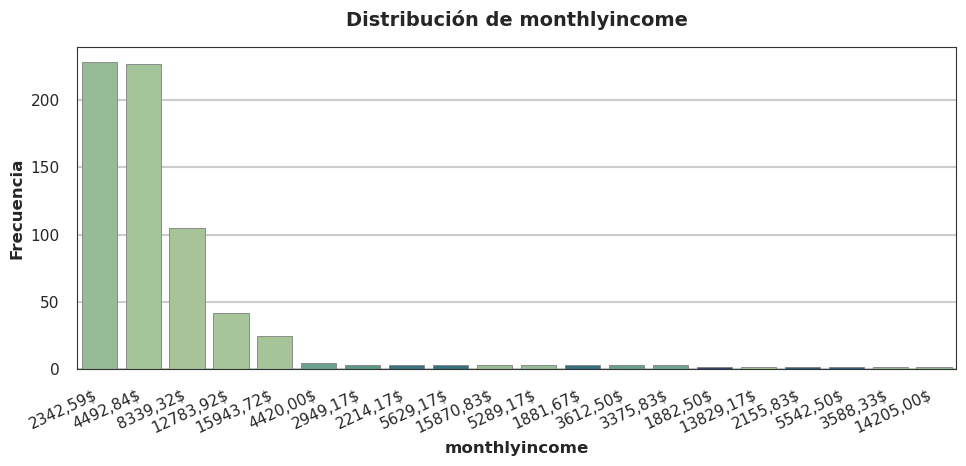

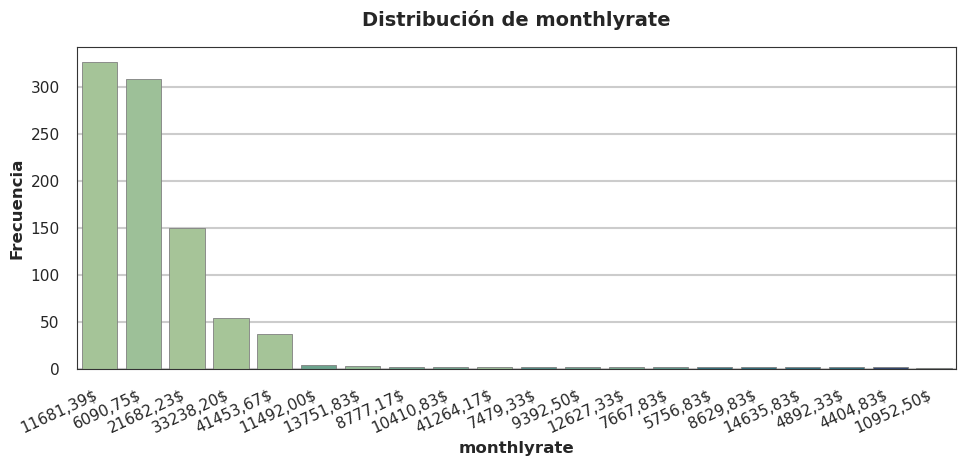

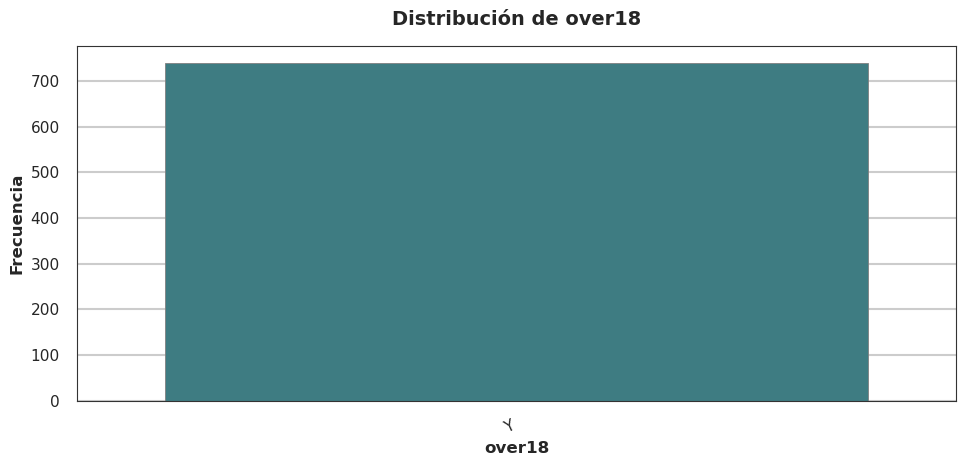

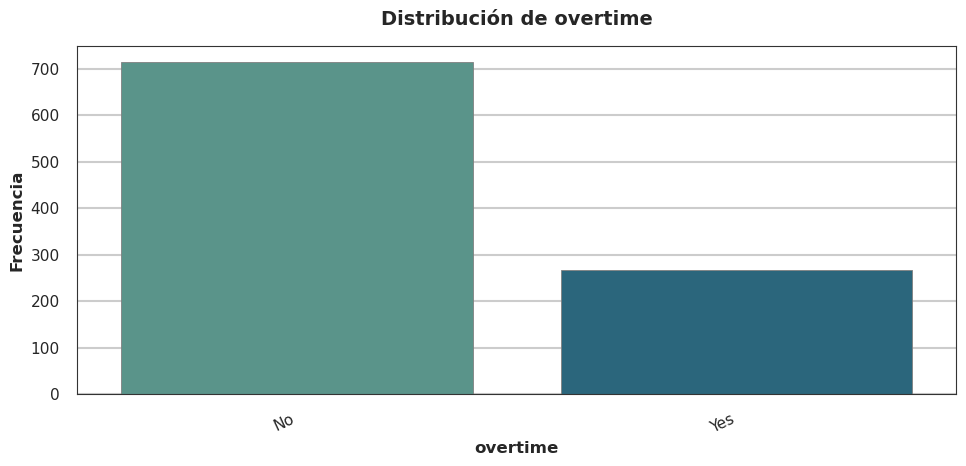

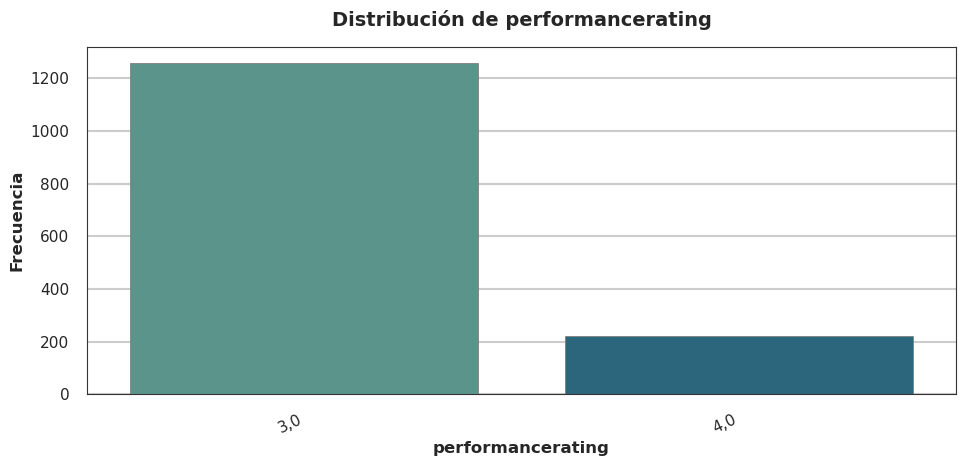

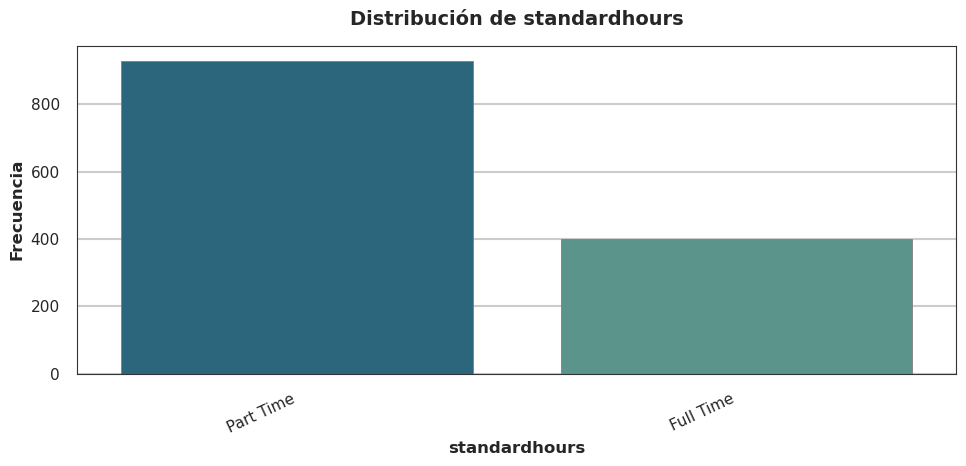

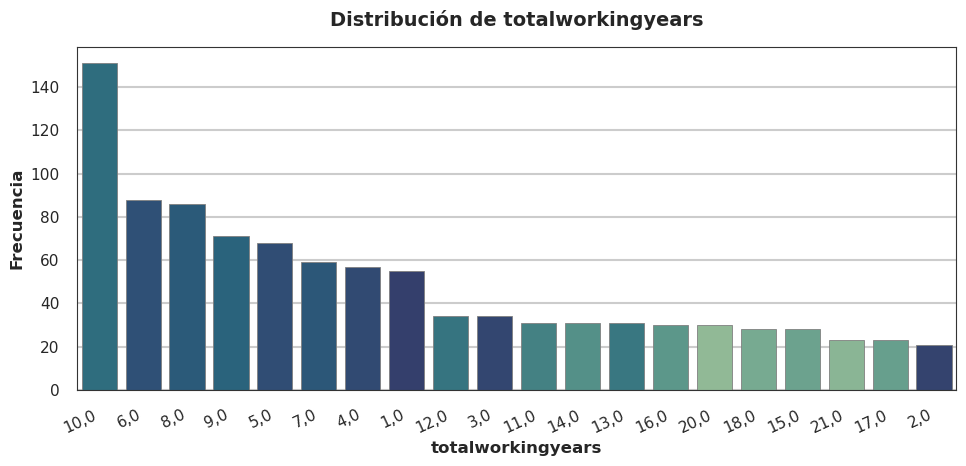

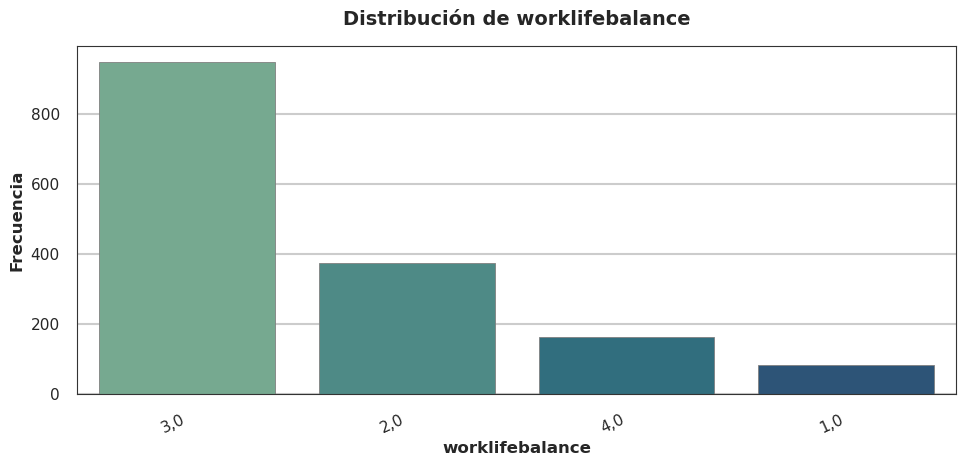

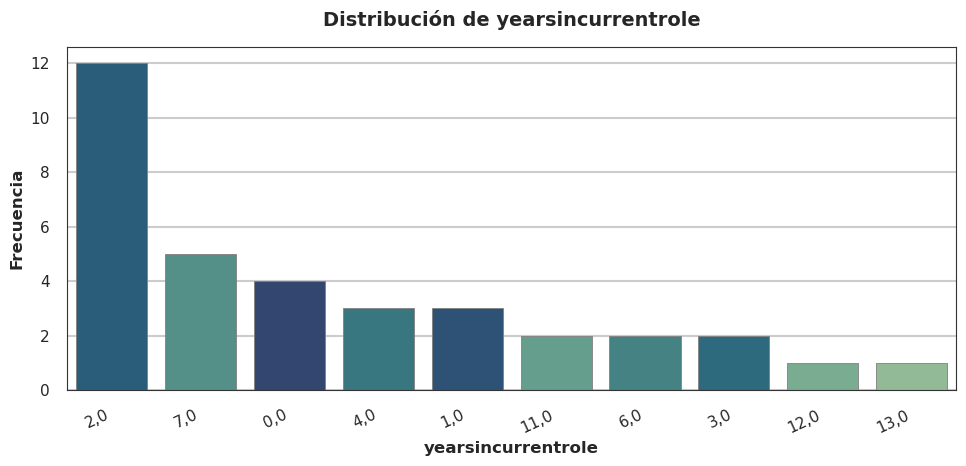

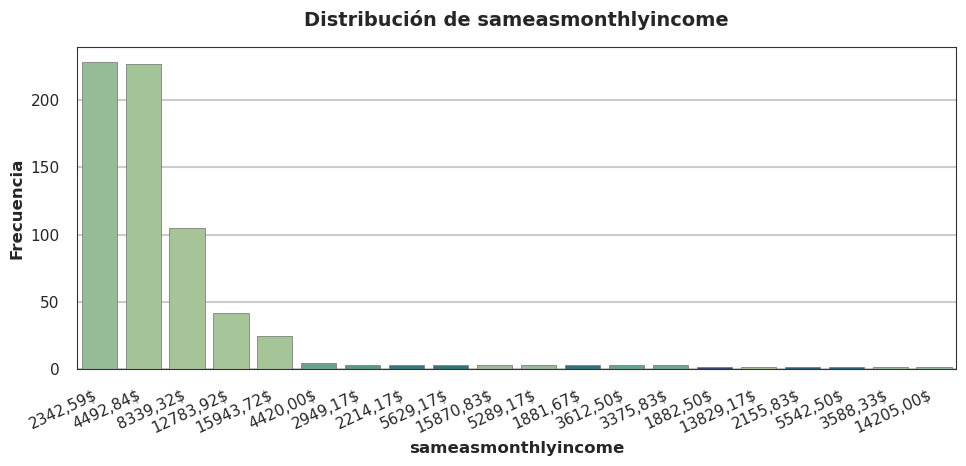

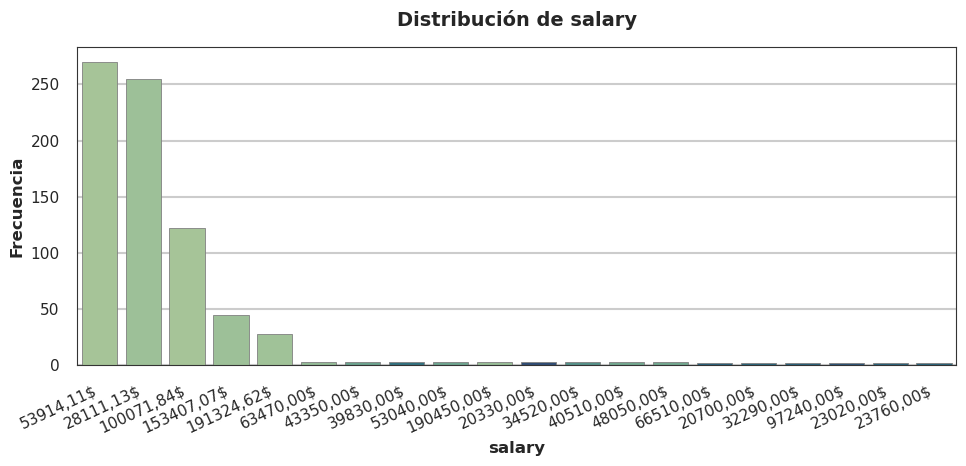

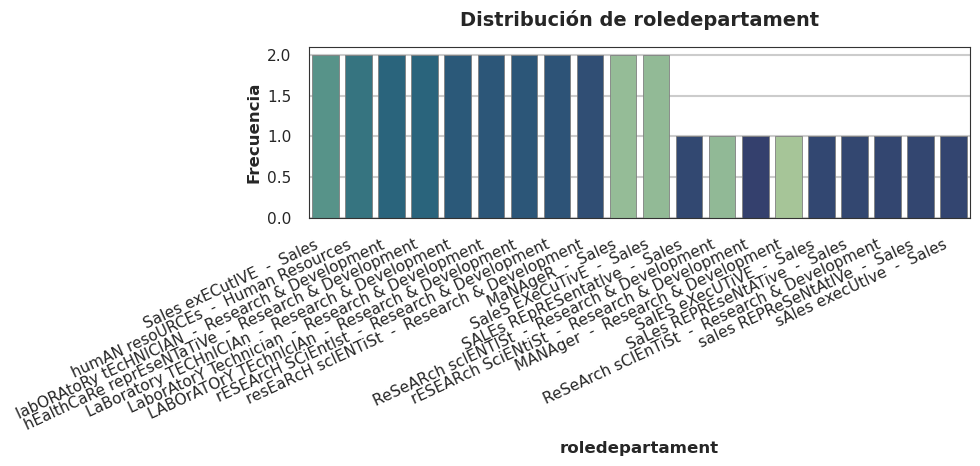

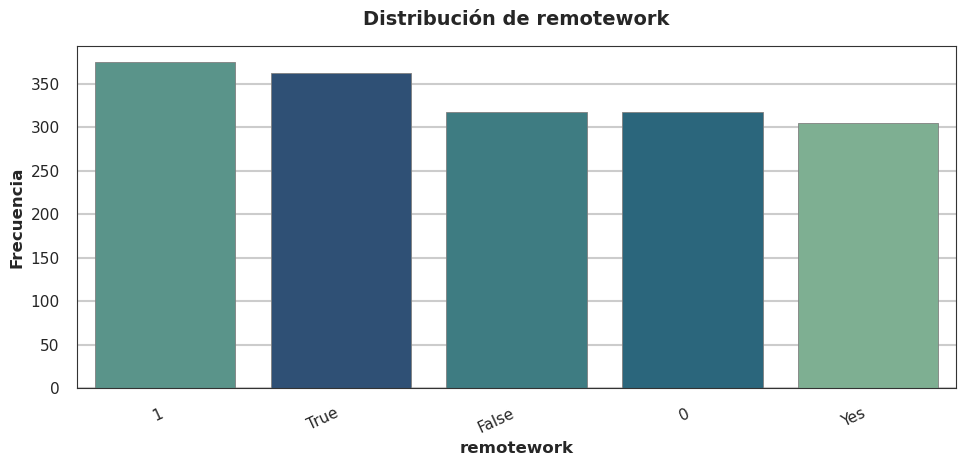

In [8]:
# EDA 
print("EDA")
resumen = eda(df_rotacion)

Del EDA extraemos una primera conclusión: no se encuentran filas duplicadas en el dataset. 

En cuanto a los valores nulos, antes de proceder a estrategias de imputación de los mismos, ciertas columnas por el porcentaje que presentan de los mismos, pueden ser directamente eliminadas como son:

- numberchildren	con un 100 % de nulos.
- yearsincurrentrole con un 97.91 % de nulos.

Otras columnas como department y roledepartment presentan un porcentaje de nulos bastante alto, del 81, 41 % pero se decidirá posteriormente que se hará con dichas variables. 

#### ANÁLISIS DE LAS GRÁFICAS DE LAS VARIABLES CATEGÓRICAS

#### ANÁLISIS DE LAS GRÁFICAS DE LAS VARIABLES NUMÉRICAS